# محمد عادل الغنام

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
x = random.sample(range(0, 20), 20)

a = -1
b = 2

y = []

for i in range(len(x)):
    hx = (-1*x[i]) + 2
    y.append(hx)
    
print(x)
print(y)

[0, 13, 12, 16, 11, 8, 4, 5, 9, 17, 3, 1, 2, 19, 6, 7, 15, 18, 14, 10]
[2, -11, -10, -14, -9, -6, -2, -3, -7, -15, -1, 1, 0, -17, -4, -5, -13, -16, -12, -8]


In [4]:
x=np.array(x)
y=np.array(y)

#### Plot your data points. 

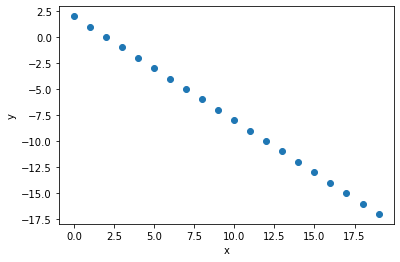

In [5]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

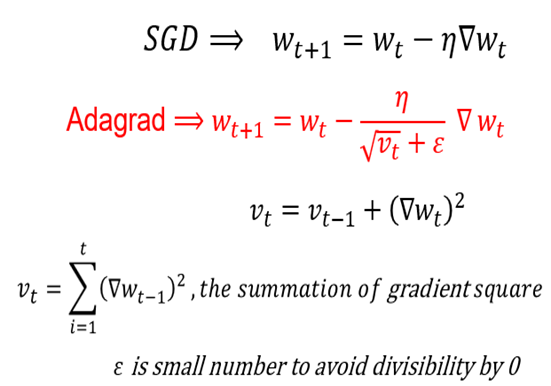

In [6]:
def adagard(x , y , iterations , e , alpha ):    
    th0=0
    th1=0
    y_pred = []
    loss_func = []
    th0_list = []
    th1_list = []
    Epochs = []
    v0 = 0
    v1 = 0
    
    for i in range(iterations):
        Epochs.append(i)
        hx = th0 + th1*x
        y_pred.append(hx)
        cost_func = (1/(2*len(x)))*sum((hx-y)**2)
        loss_func.append(cost_func)
        g0 = (1/len(x))*sum((hx-y))
        g1 = (1/len(x))*sum(((hx-y)*x))
        v0 = v0 + g0**2
        v1 = v1 + g1**2
        th0 = th0 - ((alpha/((v0**0.5)+e))*g0)
        th0_list.append(th0)
        th1 = th1 - ((alpha/((v1**0.5)+e))*g1)
        th1_list.append(th1)
        
    return(th0 , th1 , Epochs , loss_func , th0_list , th1_list , y_pred)

# ِADAGARD using alpha = 0.1 , iterations = 500

In [35]:
th0 , th1 , Epochs , loss_func , th0_list , th1_list , y_pred = adagard(x,y,500,1*10**-8 , 0.1)

In [36]:
print(th1)

-0.8810300769559275


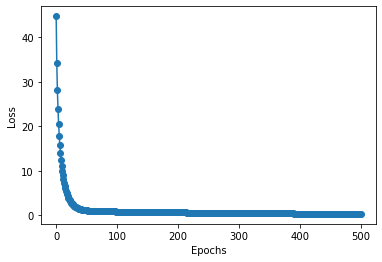

In [37]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

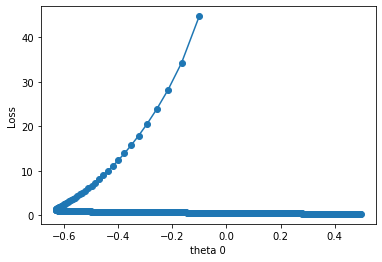

In [38]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

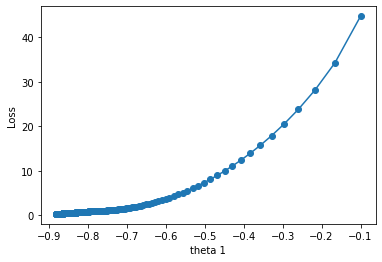

In [39]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

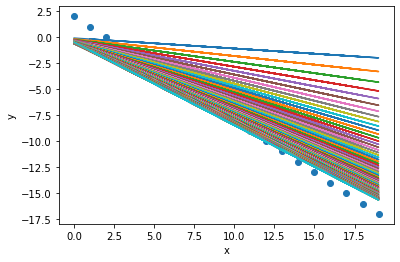

In [40]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(100):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

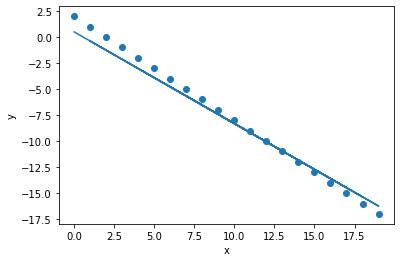

In [41]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [42]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9816290271835071


# ADAGARD using alpha = 0.00001 and iterations = 1000

In [93]:
th0 , th1 , Epochs , loss_func , th0_list , th1_list , y_pred = adagard(x,y,1000,1*10**-8 , 0.00001)

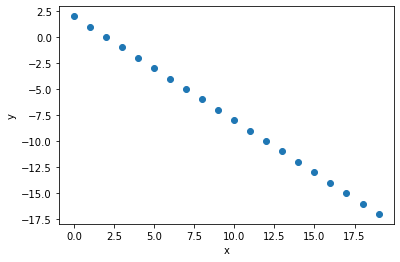

In [94]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

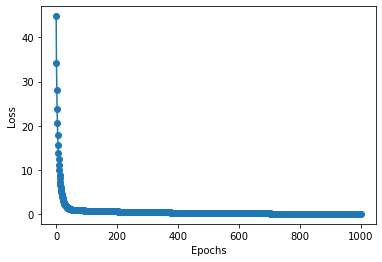

In [95]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

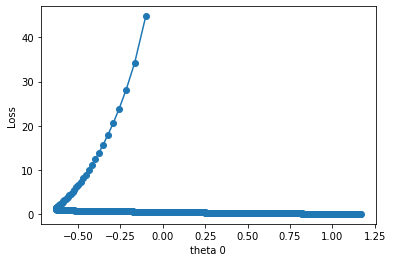

In [96]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

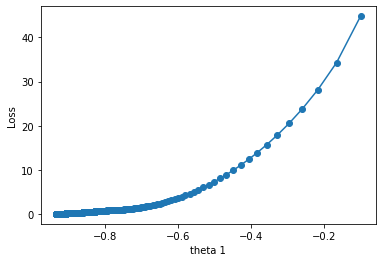

In [97]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

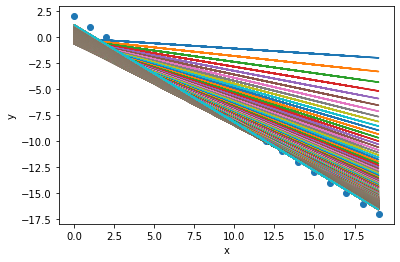

In [98]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(1000):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

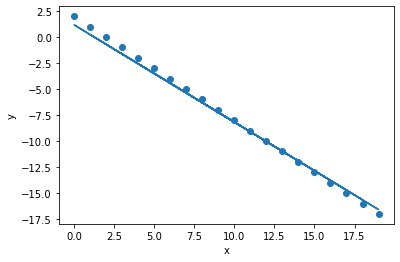

In [99]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [100]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9943524163129175


# ADAGARD using alpha = 0.005 and iterations = 60

In [202]:
th0 , th1 , Epochs , loss_func , th0_list , th1_list , y_pred = adagard(x,y,60,1*10**-8 , 0.005)

In [203]:
print("th0=" ,th0 , " th1=" , th1)

th0= -0.608170573789091  th1= -0.7646473682251399


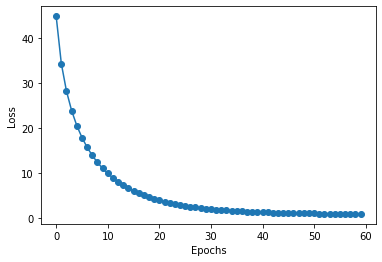

In [204]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

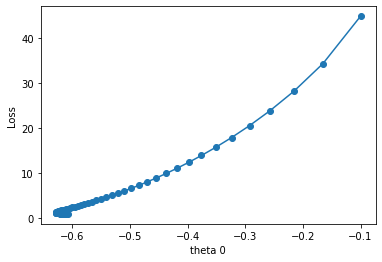

In [205]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

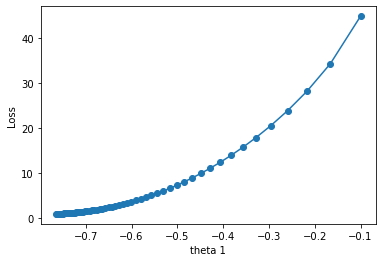

In [206]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

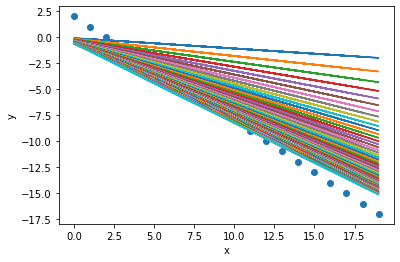

In [207]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(len(th0_list)):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

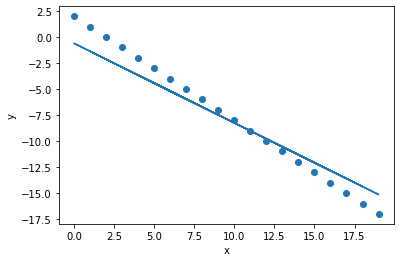

In [208]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [209]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9404400377157228


# ------------------------------------------------------------------- 

# by increasing the number of iterations and decreasing the learning rate the accuracy increases to 0.9943 meanwhile the accuracy decreased to 0.94 after doing 60 iterations

# ------------------------------------------------------------------ 

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

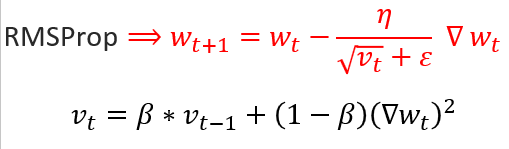

In [43]:
x = random.sample(range(0, 20), 20)
a = -1
b = 2
y=[]

for i in range(len(x)):
    hx = (-1*x[i])+2
    y.append(hx)
    
print(x)
print(y)

[10, 5, 16, 0, 13, 18, 7, 14, 8, 12, 15, 19, 3, 9, 2, 4, 17, 6, 1, 11]
[-8, -3, -14, 2, -11, -16, -5, -12, -6, -10, -13, -17, -1, -7, 0, -2, -15, -4, 1, -9]


In [44]:
x=np.array(x)
y=np.array(y)

In [45]:
def rmsprop( x , y , iterations , e , B , alpha):
    th0=0
    th1=0
    y_pred = []
    loss_func = []
    th0_list = []
    th1_list = []
    Epochs = []
    v0 = 0
    v1 = 0
    

    for i in range(iterations):
        Epochs.append(i)
        hx = th0 + th1*x
        y_pred.append(hx)
        cost_func = (1/(2*len(x)))*sum((hx-y)**2)
        loss_func.append(cost_func)
        g0 = (1/len(x))*sum((hx-y))
        g1 = (1/len(x))*sum(((hx-y)*x))
        v0 = (B*v0) + ((1-B)*(g0**2))
        v1 = (B*v1) + ((1-B)*(g1**2))
        th0 = th0 - ((alpha/((v0**0.5)+e))*g0)
        th0_list.append(th0)
        th1 = th1 - ((alpha/((v1**0.5)+e))*g1)
        th1_list.append(th1)
        
    return(th0 , th1 , loss_func , th0_list , th1_list , y_pred ,  Epochs )


# RMSPROP using alpha = 0.01 , B = 0.9 , iterations = 100

In [248]:
th0 , th1 , loss_func , th0_list , th1_list , y_pred ,  Epochs = rmsprop(x , y , 100 , 1*10**-8 , 0.9 , 0.01)

In [249]:
print("th0=" ,th0 , " th1=" , th1)

th0= -0.5308365618195232  th1= -0.7929012436689019


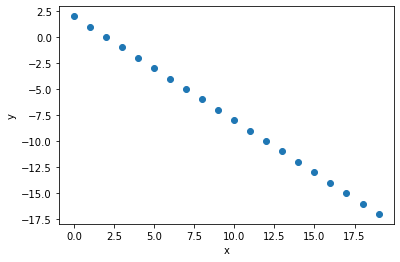

In [250]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

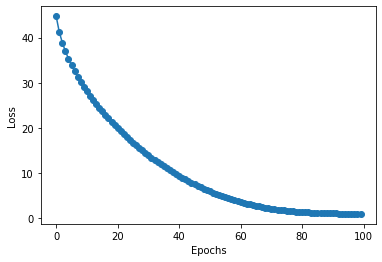

In [251]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

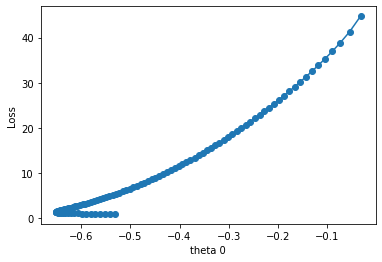

In [252]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

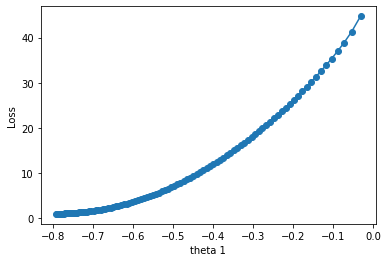

In [253]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

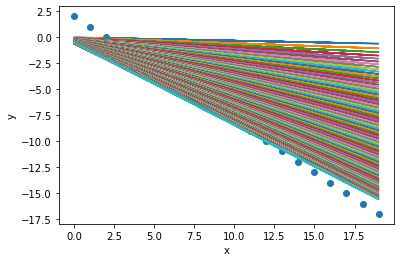

In [254]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(100):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

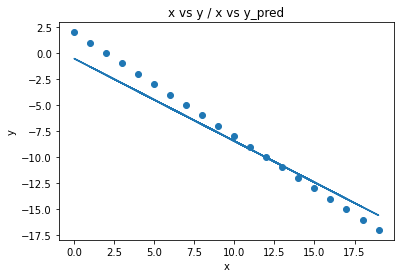

In [255]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y / x vs y_pred")
plt.show()

In [256]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9475637072061425


# RMSPROP using iterations = 1000 , B = 0.92 , alpha = 0.01

In [165]:
th0 , th1 , loss_func , th0_list , th1_list , y_pred ,  Epochs = rmsprop(x , y , 1000 , 1*10**-8 , 0.6 , 0.005)

In [166]:
print("th0=" ,th0 , " th1=" , th1)

th0= 1.9974991368632755  th1= -1.002499931707242


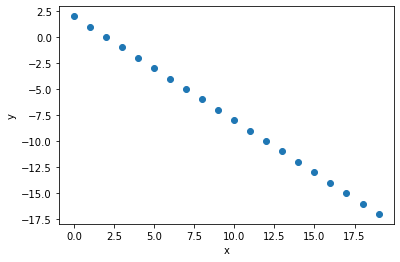

In [167]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

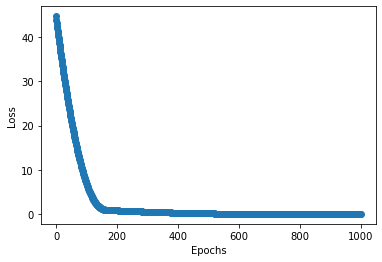

In [168]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

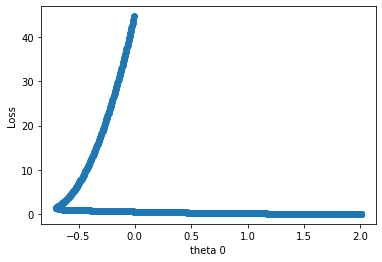

In [169]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

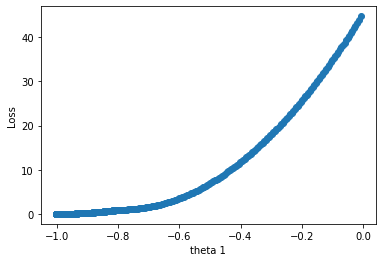

In [170]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

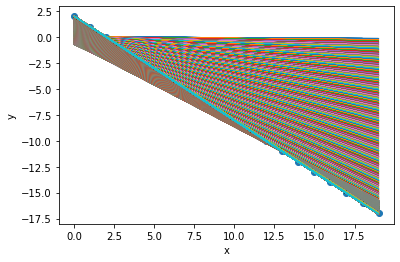

In [171]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(1000):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

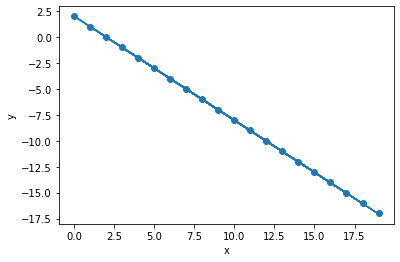

In [172]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [173]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9999730263187911


# RMSPROP using alpha = 0.01 , B = 0.2 , iter = 300

In [218]:
th0 , th1 , loss_func , th0_list , th1_list , y_pred ,  Epochs = rmsprop(x , y , 30 , 1*10**-8 , 0.2 , 0.1)

In [219]:
print("th0=" ,th0 , " th1=" , th1)

th0= 0.5511922653115384  th1= -0.83151472432946


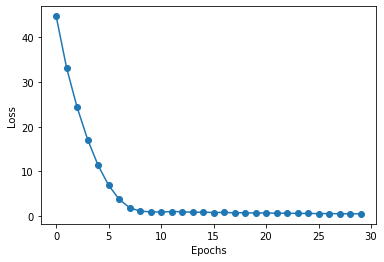

In [220]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

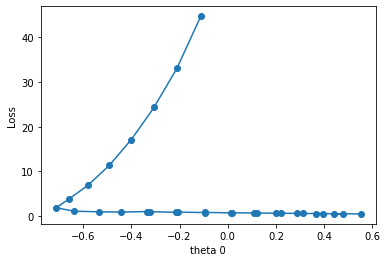

In [221]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

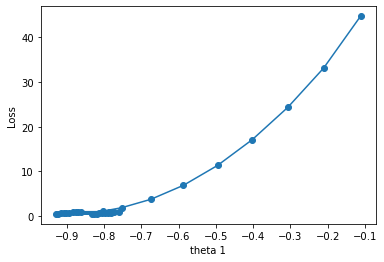

In [222]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

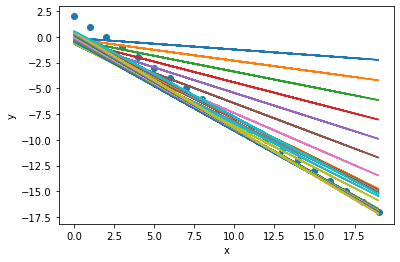

In [223]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(len(th0_list)):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

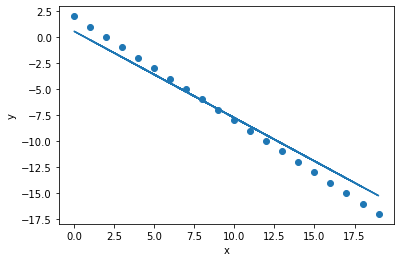

In [224]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [225]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9709196603380646


# -------------------------------------------------------------------

#  I found that the error does not affected too much by changing B value and the biggest effect came from the change of the number of iterations and the alpha value. so the R2 increased to 0.999 by increasing the itearions from 100 to 1000

# --------------------------------------------------------------------

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

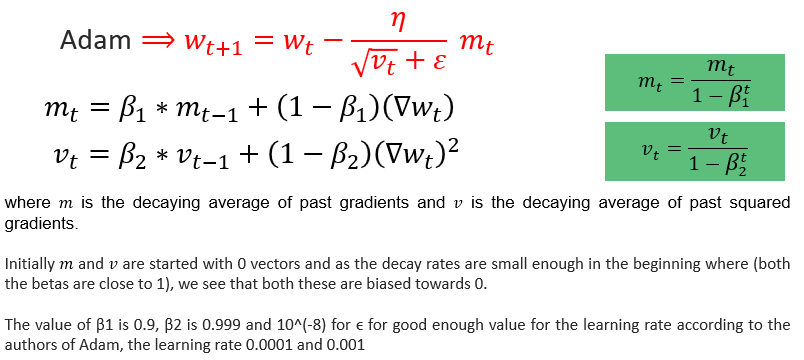

In [62]:
x = random.sample(range(0, 20), 20)
a = -1
b = 2
y=[]

for i in range(len(x)):
    hx = (-1*x[i])+2
    y.append(hx)
    
print(x)
print(y)

[2, 8, 9, 11, 19, 1, 7, 14, 13, 0, 18, 15, 3, 16, 4, 10, 6, 12, 17, 5]
[0, -6, -7, -9, -17, 1, -5, -12, -11, 2, -16, -13, -1, -14, -2, -8, -4, -10, -15, -3]


In [66]:
x=np.array(x)
y=np.array(y)

In [67]:
def adam( x, y ,iterations , alpha , e , B1 , B2  ):
    th0=0
    th1=0
    y_pred = []
    loss_func = []
    th0_list = []
    th1_list = []
    Epochs = []
    v0 = 0
    v1 = 0
    
    m0 = 0
    m1 = 0

    for i in range(1,iterations):
        Epochs.append(i)
        hx = th0 + th1*x
        y_pred.append(hx)
        cost_func = (1/(2*len(x)))*sum((hx-y)**2)
        loss_func.append(cost_func)
        g0 = (1/len(x))*sum((hx-y))
        g1 = (1/len(x))*sum(((hx-y)*x))
        m0 = (B1*m0) + ((1-B1)*g0)
        m1 = (B1*m1) + ((1-B1)*g1)
        v0 = (B2*v0) + ((1-B2)*(g0**2))
        v1 = (B2*v1) + ((1-B2)*(g1**2))
        m0_ = m0/(1-(B1**i))
        m1_ = m1/(1-(B1**i))
        v0_ = v0/(1-(B2**i))
        v1_ = v1/((1-B2**i))
        th0 = th0 - ((alpha*m0_)/((v0_**0.5)+e))
        th0_list.append(th0)
        th1 = th1 - ((alpha*m1_)/((v1_**0.5)+e))
        th1_list.append(th1)
    
    
    return(th0 , th1 , loss_func , th0_list ,  th1_list , Epochs , y_pred )

# ADAM using  iterations = 1000 , alpha = 0.01 , B1 = 0.9 , B2 = 0.999

In [74]:
th0 , th1 , loss_func , th0_list ,  th1_list , Epochs , y_pred = adam (x , y , 1000 , 0.01 , 1*10**-8 , 0.9 , 0.999)

In [75]:
print("th0=" ,th0 , " th1=" , th1)

th0= 1.3745389991955772  th1= -0.9505114183637491


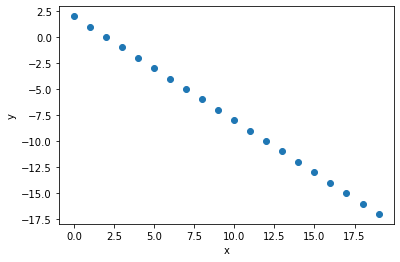

In [76]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

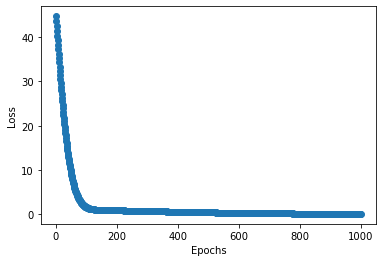

In [77]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

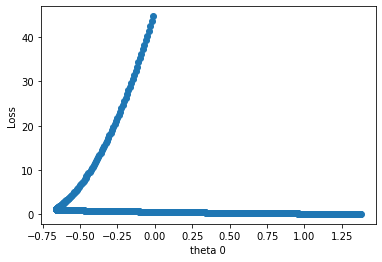

In [78]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

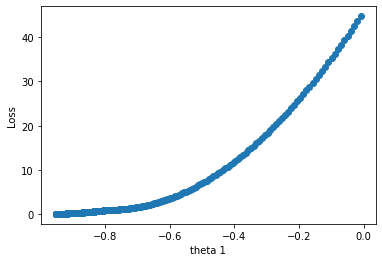

In [79]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

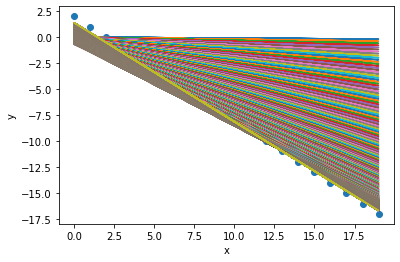

In [80]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(len(th0_list)):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

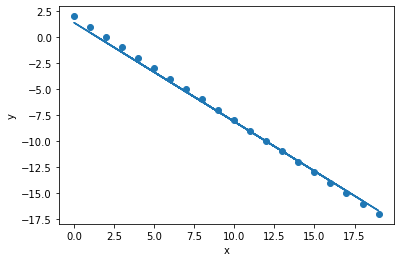

In [81]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [82]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9968253422607132


# ِADAM using iterations = 100 , alpha = 0.1 , B1 = 0.8 , B2 = 0.9

In [262]:
th0 , th1 , loss_func , th0_list ,  th1_list , Epochs , y_pred = adam (x , y , 100 , 0.1 , 1*10**-8 , 0.2 , 0.3)

In [263]:
print("th0=" ,th0 , " th1=" , th1)

th0= 1.9967388506332084  th1= -0.9637779290413003


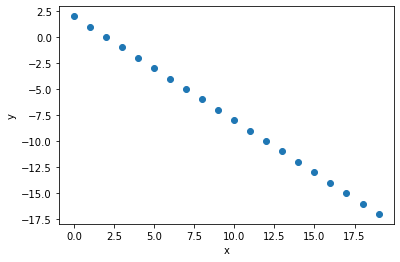

In [264]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

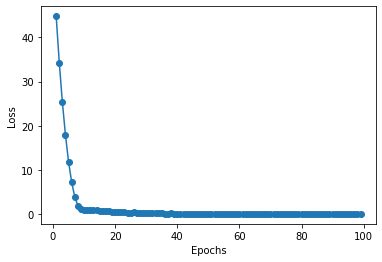

In [265]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

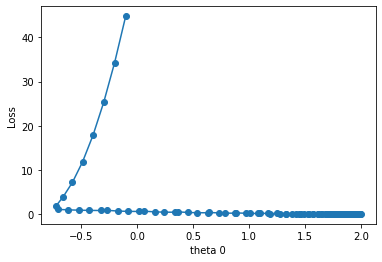

In [266]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

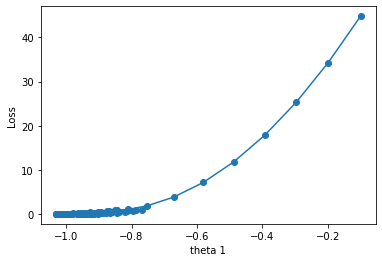

In [267]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

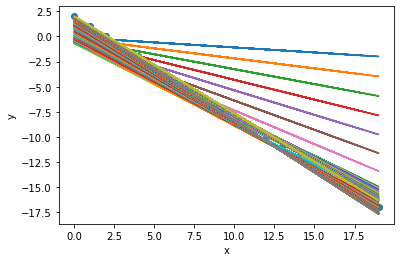

In [268]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(len(th0_list)):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

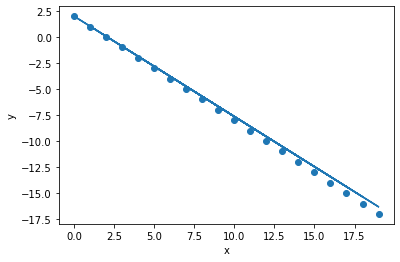

In [269]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [270]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9951938949042444


# ADAM using iterations = 80 , alpha = 0.01 , B1 = 0.6 , B2 = 0.7

In [240]:
th0 , th1 , loss_func , th0_list ,  th1_list , Epochs , y_pred = adam (x , y , 80 , 0.01 , 1*10**-8 , 0.6 , 0.7)

In [241]:
print("th0=" ,th0 , " th1=" , th1)

th0= -0.6875960940264743  th1= -0.7615735734512612


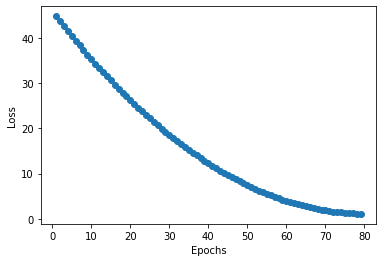

In [242]:
plt.scatter(Epochs , loss_func )
plt.plot(Epochs , loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

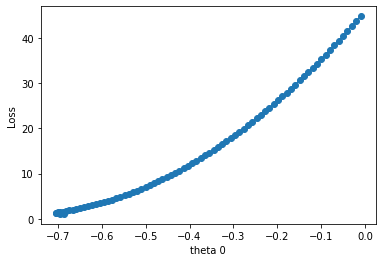

In [243]:
plt.scatter(th0_list , loss_func)
plt.plot(th0_list , loss_func)
plt.xlabel("theta 0")
plt.ylabel("Loss")
plt.show()

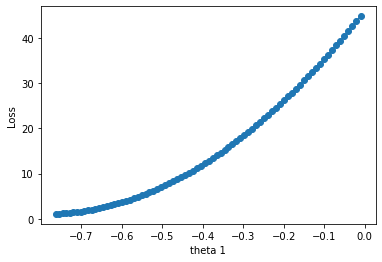

In [244]:
plt.scatter(th1_list , loss_func)
plt.plot(th1_list , loss_func)
plt.xlabel("theta 1")
plt.ylabel("Loss")
plt.show()

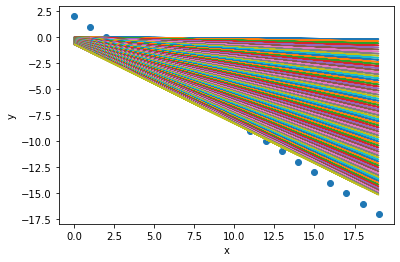

In [245]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(len(th0_list)):
    plt.plot(x , th0_list[i] + (th1_list[i]*x) )

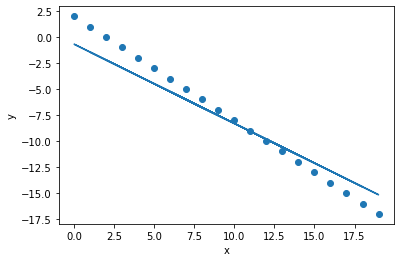

In [246]:
plt.scatter(x,y)
plt.plot(x , th0 + (th1*x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [247]:
y_p = th0 + (th1*x)
ss_residual = sum((y-y_p)**2)
ss_total = sum((y-np.mean(y))**2)
r2 = 1-(ss_residual/ss_total)
print(r2)

0.9377830853679767


#  -----------------------------------------------------------

#  because the data is too small so the values of B1 and B2 do not affect the results. the number of iterations and the learning rate are affecing the results too much. so the accuracy decreased to 0.937 after decreasing the number of iterations.

# Adam combines the best properties of RMSProp and AdaGrad to work well even with noisy or sparse datasets

# the accuracy of rmsprop and adam are higher than Adagrad using same parameters

# -----------------------------------------------------------

## Congratulations 
![image.png](attachment:image.png)

# thanks dr/ahmed for your great effort with us